In [1]:
#import library file
import numpy as np
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
#to read the h5 data
from lr_utils import load_dataset

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#load train and test data
train_data_set_x, train_data_set_y, test_data_set_x, test_data_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


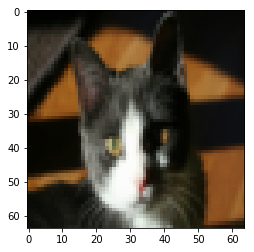

In [3]:
#example of the train data set image
index = 19
plt.imshow(train_data_set_x[index])
print("y = " + str(train_data_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_data_set_y[:, index])].decode("utf-8") + "' picture.")

In [4]:
m_train = train_data_set_x.shape[0]
m_test = test_data_set_x.shape[0]
num_px = train_data_set_x.shape[1]

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(train_data_set_x.shape[1]) + ", " + str(train_data_set_x.shape[2]) + ", " + str(train_data_set_x.shape[3]) + ")")
print("train_data_set_x shape: " + str(train_data_set_x.shape))
print("train_data_set_y shape: " + str(train_data_set_y.shape))
print("test_data_set_x shape: " + str(test_data_set_x.shape))
print("test_data_set_y shape: " + str(test_data_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_data_set_x shape: (209, 64, 64, 3)
train_data_set_y shape: (1, 209)
test_data_set_x shape: (50, 64, 64, 3)
test_data_set_y shape: (1, 50)


In [5]:
#reshape the training and test examples

train_data_set_x_flatten = train_data_set_x.reshape(train_data_set_x.shape[0], -1).T
test_data_set_x_flatten = test_data_set_x.reshape(test_data_set_x.shape[0], -1).T

print("train_data_set_x_flatten shape: " + str(train_data_set_x_flatten.shape))
print("train_data_set_y shape: " + str(train_data_set_y.shape))
print("test_data_set_x_flatten shape: " + str(test_data_set_x_flatten.shape))
print("test_data_set_y shape: " + str(test_data_set_y.shape))

train_data_set_x_flatten shape: (12288, 209)
train_data_set_y shape: (1, 209)
test_data_set_x_flatten shape: (12288, 50)
test_data_set_y shape: (1, 50)


In [6]:
#standardize the dataset
train_set_x = train_data_set_x_flatten/255.
test_set_x = test_data_set_x_flatten/255.

In [7]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [8]:
def initialize_with_zeros(dim):
    '''
    return w-> initialized vector of shape (dim, 1)
    return b-> initialized scalar (corresponds to the bias)
    '''
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [9]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X)+b)
    cost = -(np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)))/m
    
    # Backward propagation
    dw = (np.dot(X, (A-Y).T))/m
    db = (np.sum(A-Y))/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {
        "dw" : dw,
        "db" : db
    }
    
    return grads, cost

In [10]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
            
    params = {
        "w" : w,
        "b" : b
    }
    
    grads = {
        "dw" : dw,
        "db" : db
    }
    
    return params, grads, costs

In [14]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [19]:
d = model(train_set_x, train_data_set_y, test_set_x, test_data_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

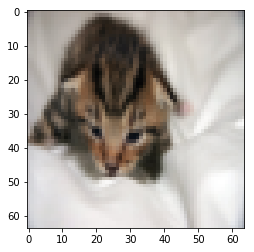

In [22]:
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_data_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")